In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [113]:
data = pd.read_csv(r"C:\Users\Eva\Downloads\Bank+Customer+Churn\Bank_Churn(New).csv")

In [114]:
pd.set_option('display.max.rows',None)
pd.set_option('display.max.columns',None)
data.head()


,CustomerId,Surname,Geography,Gender,Exited,CreditCard,Active Member,CreditScore,Age,Tenure,Balance,No of Products,EstimatedSalary
0,15634602,Hargrave,France,Female,Yes,Yes,Yes,619,42,2,0.00,1,101348.88
1,15647311,Hill,Spain,Female,No,No,Yes,608,41,1,83807.86,1,112542.58
2,15619304,Onio,France,Female,Yes,Yes,No,502,42,8,159660.80,3,113931.57
3,15701354,Boni,France,Female,No,No,No,699,39,1,0.00,2,93826.63
4,15737888,Mitchell,Spain,Female,No,Yes,Yes,850,43,2,125510.82,1,79084.10


In [115]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Exited           10000 non-null  object 
 5   CreditCard       10000 non-null  object 
 6   Active Member    10000 non-null  object 
 7   CreditScore      10000 non-null  int64  
 8   Age              10000 non-null  int64  
 9   Tenure           10000 non-null  int64  
 10  Balance          10000 non-null  float64
 11  No of Products   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1015.8+ KB


In [116]:
data.duplicated().sum()

0

In [117]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
No of Products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [118]:
data.isnull().sum()

CustomerId         0
Surname            0
Geography          0
Gender             0
Exited             0
CreditCard         0
Active Member      0
CreditScore        0
Age                0
Tenure             0
Balance            0
No of Products     0
EstimatedSalary    0
dtype: int64

In [119]:
data.shape

(10000, 13)

In [120]:
from copy import deepcopy
df=deepcopy(data)

In [121]:
df.head(5)

,CustomerId,Surname,Geography,Gender,Exited,CreditCard,Active Member,CreditScore,Age,Tenure,Balance,No of Products,EstimatedSalary
0,15634602,Hargrave,France,Female,Yes,Yes,Yes,619,42,2,0.00,1,101348.88
1,15647311,Hill,Spain,Female,No,No,Yes,608,41,1,83807.86,1,112542.58
2,15619304,Onio,France,Female,Yes,Yes,No,502,42,8,159660.80,3,113931.57
3,15701354,Boni,France,Female,No,No,No,699,39,1,0.00,2,93826.63
4,15737888,Mitchell,Spain,Female,No,Yes,Yes,850,43,2,125510.82,1,79084.10


In [122]:
df['Exited'] = df['Exited'].replace({'Yes': 1, 'No': 0}).astype(int)
 # If possible


In [123]:
def Age_Category(Age):
    
    if (Age > 13) and (Age <= 20):
        return "Teenager"
    elif (Age > 20) and (Age <= 30):
        return "Young adult"
    elif (Age > 30) and (Age <= 60):
        return "Adult"
    else:
        return "Elder"

    
    
    
df['Age_Category']=df['Age'].apply(Age_Category)





In [124]:
print(df['Age_Category'].unique())




['Adult' 'Young adult' 'Elder' 'Teenager']


In [125]:
cat_features=df.select_dtypes(include=['object'])
cat_features.head()

,Surname,Geography,Gender,CreditCard,Active Member,Age_Category
0,Hargrave,France,Female,Yes,Yes,Adult
1,Hill,Spain,Female,No,Yes,Adult
2,Onio,France,Female,Yes,No,Adult
3,Boni,France,Female,No,No,Adult
4,Mitchell,Spain,Female,Yes,Yes,Adult


In [126]:
cat_features = [col for col in df.select_dtypes(include=['object']).columns if col != 'Surname']
 

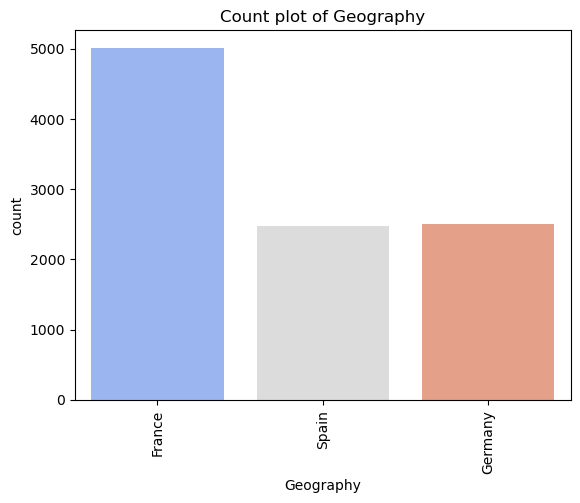

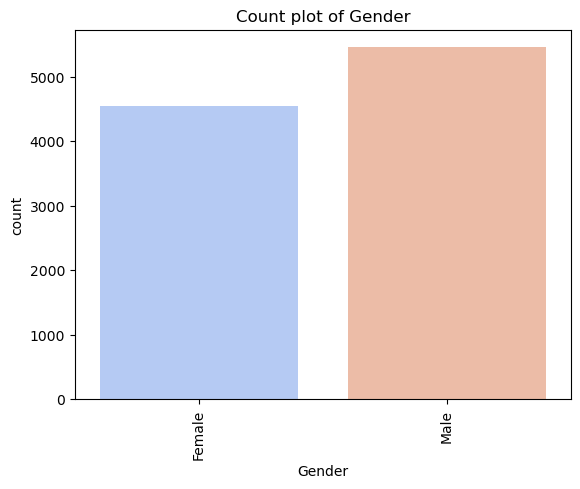

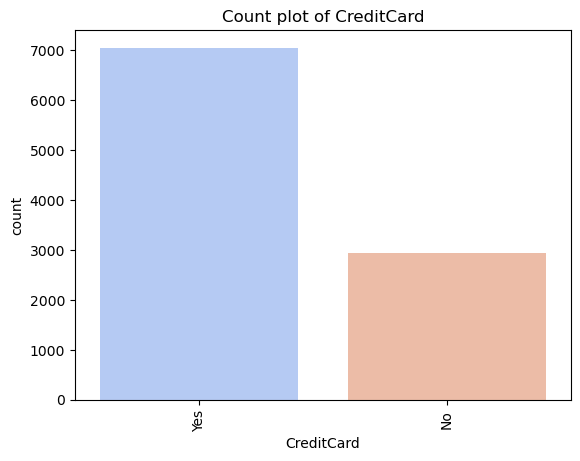

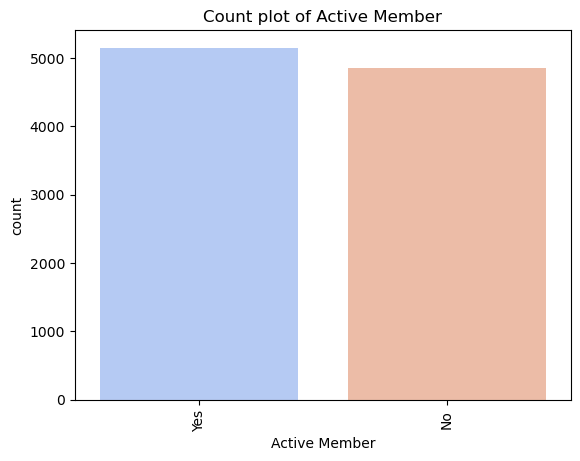

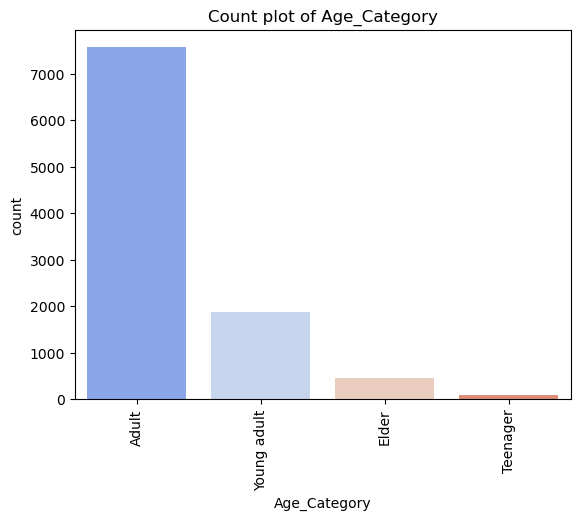

In [127]:
custom_palette=['#FF5733', '#33FF57', '#3357FF', '#FF33A1']

for col in cat_features:
    sns.countplot(x=col, data=df, palette='coolwarm')
    plt.title (f'Count plot of {col}')
    plt.xticks(rotation=90)
    plt.show()

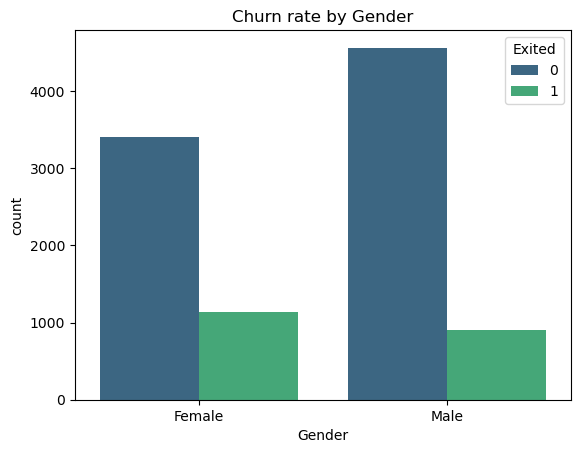

In [128]:
sns.countplot(x=df['Gender'],hue=df['Exited'], palette='viridis')
plt.title ('Churn rate by Gender')
plt.show()

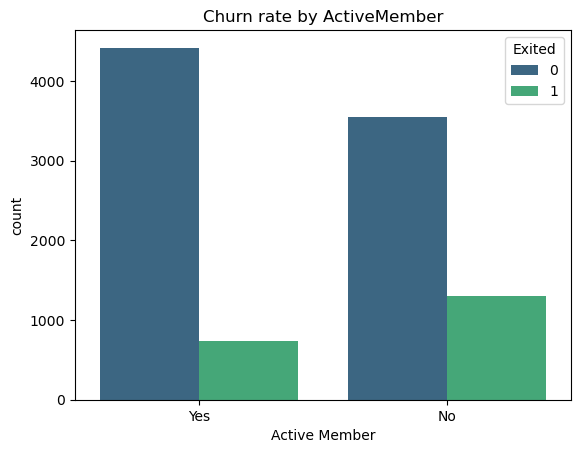

In [129]:
sns.countplot(x=df['Active Member'], hue=df['Exited'],palette='viridis')
plt.title('Churn rate by ActiveMember')
plt.show()

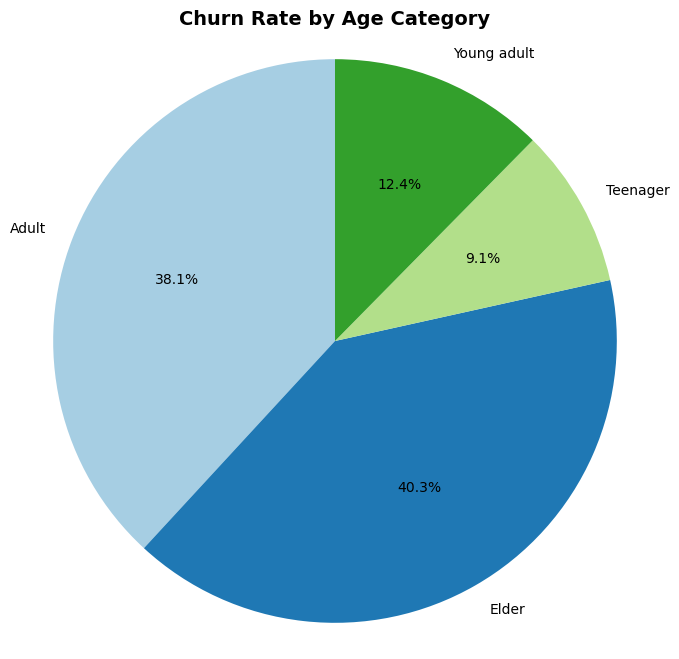

In [130]:
import matplotlib.pyplot as plt

# Group by 'Age_Category' and calculate the churn rate
churn_by_age = df.groupby('Age_Category')['Exited'].mean().reset_index()

# Set figure size
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(churn_by_age['Exited'], labels=churn_by_age['Age_Category'], 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Churn Rate by Age Category', fontsize=14, fontweight='bold')

# Ensure the pie chart is a perfect circle
plt.axis('equal')

# Display the plot
plt.show()


In [131]:
print(df['Exited'].unique())

[1 0]


In [132]:
df.head()

,CustomerId,Surname,Geography,Gender,Exited,CreditCard,Active Member,CreditScore,Age,Tenure,Balance,No of Products,EstimatedSalary,Age_Category
0,15634602,Hargrave,France,Female,1,Yes,Yes,619,42,2,0.00,1,101348.88,Adult
1,15647311,Hill,Spain,Female,0,No,Yes,608,41,1,83807.86,1,112542.58,Adult
2,15619304,Onio,France,Female,1,Yes,No,502,42,8,159660.80,3,113931.57,Adult
3,15701354,Boni,France,Female,0,No,No,699,39,1,0.00,2,93826.63,Adult
4,15737888,Mitchell,Spain,Female,0,Yes,Yes,850,43,2,125510.82,1,79084.10,Adult


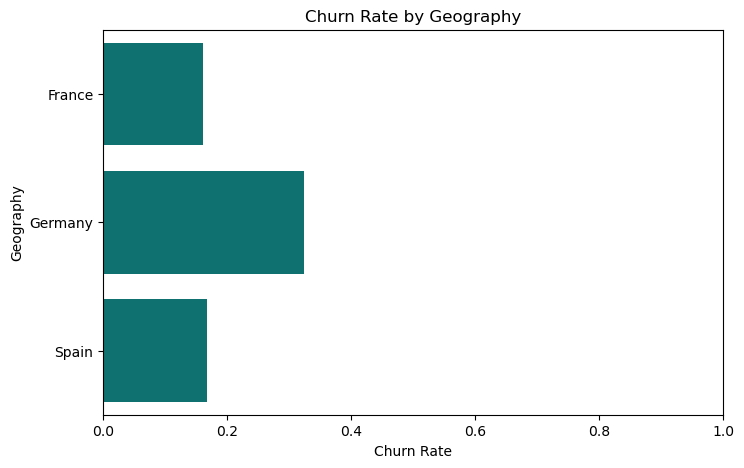

In [133]:
plt.figure(figsize=(8, 5))

# Calculate the mean churn rate for each geography
churn_by_geography = df.groupby('Geography')['Exited'].mean().reset_index()

# Create the barplot
sns.barplot(y='Geography', x='Exited', data=churn_by_geography, color='#00827F')

plt.xlabel('Churn Rate')
plt.ylabel('Geography')
plt.title('Churn Rate by Geography')
plt.xlim(0, 1)  # Churn rate is a percentage (0 to 1)

plt.show()



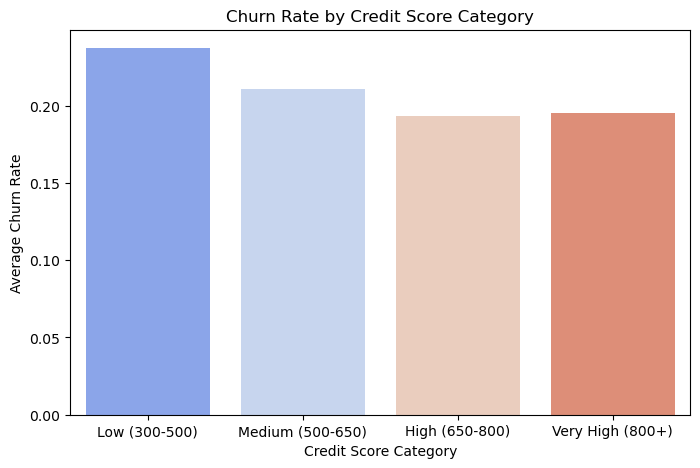

In [134]:
# Define bins for credit scores
bins = [300, 500, 650, 800, 900]  # Adjust based on your dataset
labels = ['Low (300-500)', 'Medium (500-650)', 'High (650-800)', 'Very High (800+)']

# Create a new column for Credit Score Category
df['CreditScore_Category'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

# Compute churn rate per credit score category
churn_by_credit = df.groupby('CreditScore_Category', as_index=False)['Exited'].mean()

# Plot the churn rate per credit score category
plt.figure(figsize=(8, 5))
sns.barplot(x='CreditScore_Category', y='Exited', data=churn_by_credit, palette='coolwarm')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Churn Rate')
plt.title('Churn Rate by Credit Score Category')
plt.show()


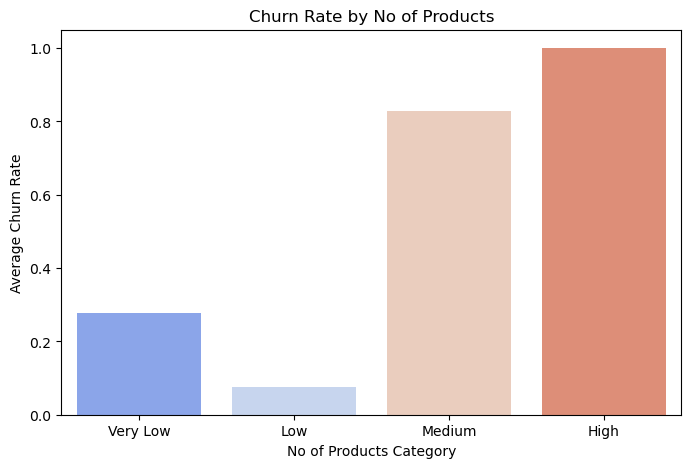

In [135]:
# Define bins for values 1 to 5 (adding 0 to include all)
bins = [ 1, 2, 3, 4, 5]  
labels = ['Very Low', 'Low', 'Medium', 'High']  # 5 labels for 6 edges

# Create a new column for Credit Score Category
df['No of Products_Category'] = pd.cut(df['No of Products'], bins=bins, labels=labels, right=False)

# Compute churn rate per credit score category
churn_by_credit = df.groupby('No of Products_Category', as_index=False)['Exited'].mean()

# Plot the churn rate per credit score category
plt.figure(figsize=(8, 5))
sns.barplot(x='No of Products_Category', y='Exited', data=churn_by_credit, palette='coolwarm')
plt.xlabel('No of Products Category')
plt.ylabel('Average Churn Rate')
plt.title('Churn Rate by No of Products')
plt.show()


## DATA TRANSFORMATION

In [136]:
df.head()

,CustomerId,Surname,Geography,Gender,Exited,CreditCard,Active Member,CreditScore,Age,Tenure,Balance,No of Products,EstimatedSalary,Age_Category,CreditScore_Category,No of Products_Category
0,15634602,Hargrave,France,Female,1,Yes,Yes,619,42,2,0.00,1,101348.88,Adult,Medium (500-650),Very Low
1,15647311,Hill,Spain,Female,0,No,Yes,608,41,1,83807.86,1,112542.58,Adult,Medium (500-650),Very Low
2,15619304,Onio,France,Female,1,Yes,No,502,42,8,159660.80,3,113931.57,Adult,Medium (500-650),Medium
3,15701354,Boni,France,Female,0,No,No,699,39,1,0.00,2,93826.63,Adult,High (650-800),Low
4,15737888,Mitchell,Spain,Female,0,Yes,Yes,850,43,2,125510.82,1,79084.10,Adult,Very High (800+),Very Low


In [137]:
df['Exited'] = df['Exited'].map({1: 'Yes', 0: 'No'}).astype(str)


In [138]:
cat_feature=df.select_dtypes(include=['object','category','int','float']).drop(columns=['Surname','CustomerId','No of Products_Category','CreditScore_Category'])
cat_feature.head()

,Geography,Gender,Exited,CreditCard,Active Member,CreditScore,Age,Tenure,Balance,No of Products,EstimatedSalary,Age_Category
0,France,Female,Yes,Yes,Yes,619,42,2,0.00,1,101348.88,Adult
1,Spain,Female,No,No,Yes,608,41,1,83807.86,1,112542.58,Adult
2,France,Female,Yes,Yes,No,502,42,8,159660.80,3,113931.57,Adult
3,France,Female,No,No,No,699,39,1,0.00,2,93826.63,Adult
4,Spain,Female,No,Yes,Yes,850,43,2,125510.82,1,79084.10,Adult


In [139]:
cat_feature['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [140]:
cat_feature['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [141]:
cat_feature['Exited'].value_counts()

Exited
No     7963
Yes    2037
Name: count, dtype: int64

In [142]:
cat_feature['CreditCard'].value_counts()

CreditCard
Yes    7055
No     2945
Name: count, dtype: int64

In [143]:
cat_feature['Active Member'].value_counts()

Active Member
Yes    5151
No     4849
Name: count, dtype: int64

In [144]:
cat_feature['Age_Category'].value_counts()

Age_Category
Adult          7568
Young adult    1879
Elder           464
Teenager         89
Name: count, dtype: int64

In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
le=LabelEncoder()

In [147]:
exclude_cols=['Balance','EstimatedSalary']

In [148]:
for column in cat_feature.columns:
    if column not in exclude_cols:
        cat_feature[column] = le.fit_transform(cat_feature[column])

In [149]:
cat_feature= cat_feature.drop(columns=['Age'])

In [150]:
cat_feature.head(5)

,Geography,Gender,Exited,CreditCard,Active Member,CreditScore,Tenure,Balance,No of Products,EstimatedSalary,Age_Category
0,0,0,1,1,1,228,2,0.00,0,101348.88,0
1,2,0,0,0,1,217,1,83807.86,0,112542.58,0
2,0,0,1,1,0,111,8,159660.80,2,113931.57,0
3,0,0,0,0,0,308,1,0.00,1,93826.63,0
4,2,0,0,1,1,459,2,125510.82,0,79084.10,0


In [151]:
cat_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geography        10000 non-null  int32  
 1   Gender           10000 non-null  int32  
 2   Exited           10000 non-null  int32  
 3   CreditCard       10000 non-null  int32  
 4   Active Member    10000 non-null  int32  
 5   CreditScore      10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   No of Products   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Age_Category     10000 non-null  int32  
dtypes: float64(2), int32(6), int64(3)
memory usage: 625.1 KB


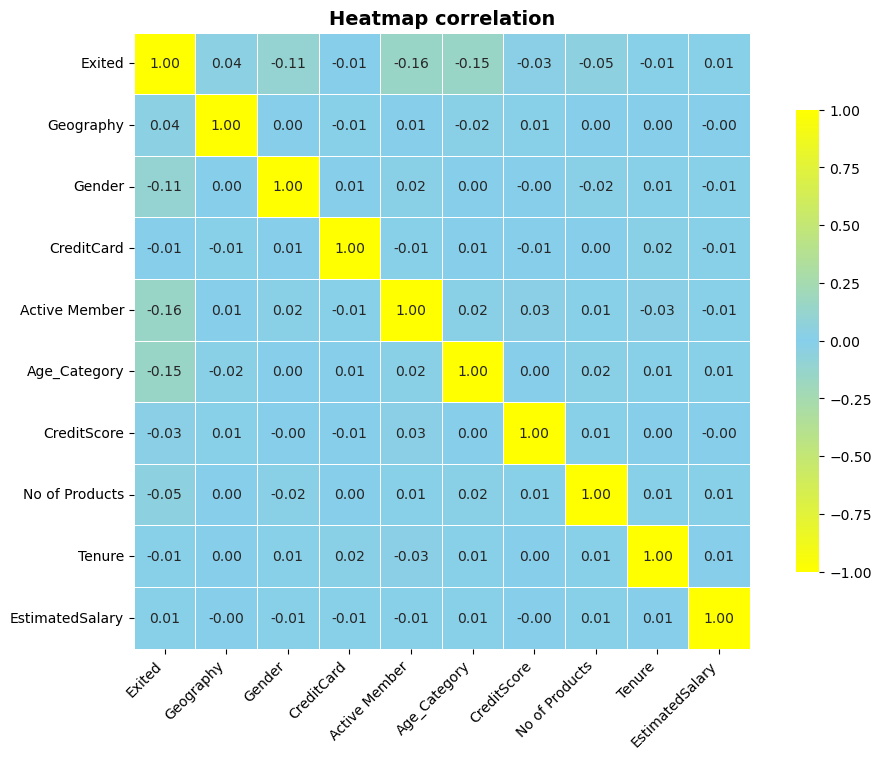

In [152]:
from matplotlib.colors import LinearSegmentedColormap
corr=cat_feature[['Exited','Geography','Gender','CreditCard','Active Member','Age_Category',
                  'CreditScore','No of Products','Tenure','EstimatedSalary']].corr()

custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["yellow", "skyblue", "yellow"])

plt.figure(figsize=(12,8))
ax=sns.heatmap(corr,vmin=-1, vmax=1, center=0,square=True, annot=True, fmt=".2f",
                 cmap=custom_cmap, linewidths=0.5, cbar_kws={'shrink': 0.75})

ax.set_xticklabels(ax.get_xticklabels() ,rotation=45,ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
                   
plt.title('Heatmap correlation', fontsize=14,fontweight='bold')

plt.show()

## FEATURE SELECTION

In [153]:
X=cat_feature[['No of Products','Active Member','Age_Category','Gender','CreditCard','CreditScore','Geography','Tenure','Balance','EstimatedSalary']]
y=cat_feature['Exited']

In [154]:
cat_feature['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Text(0.5, 1.0, 'Countplot of Churned customers')

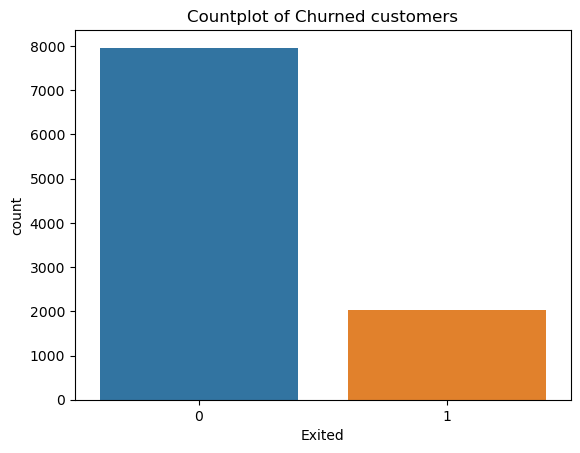

In [155]:
sns.countplot(x='Exited',data=cat_feature)
plt.title('Countplot of Churned customers')

In [156]:
X=cat_feature.drop('Exited', axis=1)
y=cat_feature['Exited']

In [157]:
!pip install --upgrade scikit-learn imbalanced-learn

In [158]:
from imblearn.over_sampling import SMOTE

In [159]:
X.head()

,Geography,Gender,CreditCard,Active Member,CreditScore,Tenure,Balance,No of Products,EstimatedSalary,Age_Category
0,0,0,1,1,228,2,0.00,0,101348.88,0
1,2,0,0,1,217,1,83807.86,0,112542.58,0
2,0,0,1,0,111,8,159660.80,2,113931.57,0
3,0,0,0,0,308,1,0.00,1,93826.63,0
4,2,0,1,1,459,2,125510.82,0,79084.10,0


In [160]:
cat_feature.isnull().sum()

Geography          0
Gender             0
Exited             0
CreditCard         0
Active Member      0
CreditScore        0
Tenure             0
Balance            0
No of Products     0
EstimatedSalary    0
Age_Category       0
dtype: int64

## BALANCING MY DATASET

In [161]:
X_sm,y_sm=SMOTE().fit_resample(X,y)

In [162]:
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

## Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
import random
np.random.seed(0)
random.seed(0)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

## FEATURE SCALING

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
sc= StandardScaler()

In [167]:
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [168]:
(X_train)

array([[-0.8973601 , -0.83681155, -1.28678924, ...,  1.02186015,
        -0.15100177, -0.44680076],
       [-0.8973601 ,  1.19501219, -1.28678924, ...,  1.02186015,
         0.74287239, -0.44680076],
       [ 0.4258306 , -0.83681155, -1.28678924, ..., -0.73194536,
        -0.95992484, -0.44680076],
       ...,
       [-0.8973601 ,  1.19501219,  0.77712804, ..., -0.73194536,
        -0.05738959, -0.44680076],
       [-0.8973601 , -0.83681155,  0.77712804, ..., -0.73194536,
        -0.20980645, -0.44680076],
       [ 0.4258306 ,  1.19501219,  0.77712804, ..., -0.73194536,
        -0.82107998, -0.44680076]])

In [169]:
model=LogisticRegression().fit(X_train,y_train)

In [170]:
predictions1=model.predict(X_test)

## MODEL EVALUATION

In [171]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
print('Accuracy:', accuracy_score(y_test,predictions1))

Accuracy: 0.7492153170119272


In [172]:
f1_score(y_test, predictions1)

0.7497651111807078

In [173]:
recall_score(y_test,predictions1)

0.7707662588538313

In [174]:
precision_score(y_test,predictions1)

0.7298780487804878

In [175]:
train_accuracy =accuracy_score(y_train,model.predict(X_train))
print('Training accuracy:',train_accuracy)

test_accuracy= accuracy_score(y_test,model.predict(X_test))
print('Testing accuracy:',test_accuracy)

if train_accuracy > test_accuracy:
    print("Possible overfitting: Model performs better on training data than test data")
elif test_accuracy < train_accuracy:
    print ("Possible underfitting : Model performs better on testing data than training data")
else:
    print("Model is performing consistently on both training and testing data")

Training accuracy: 0.7494505494505495
Testing accuracy: 0.7492153170119272
Possible overfitting: Model performs better on training data than test data


In [176]:
print('Accuracy:', accuracy_score(y_test,model.predict(X_test)))

Accuracy: 0.7492153170119272


In [177]:
precision_score(y_test, model.predict(X_test))

0.7298780487804878

In [178]:
from sklearn.metrics import classification_report

print (classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1633
           1       0.73      0.77      0.75      1553

    accuracy                           0.75      3186
   macro avg       0.75      0.75      0.75      3186
weighted avg       0.75      0.75      0.75      3186



In [179]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [180]:
f1_score(y_test, model.predict(X_test))

0.7497651111807078

In [181]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,predictions1)

print(cm)

[[1190  443]
 [ 356 1197]]


<Axes: >

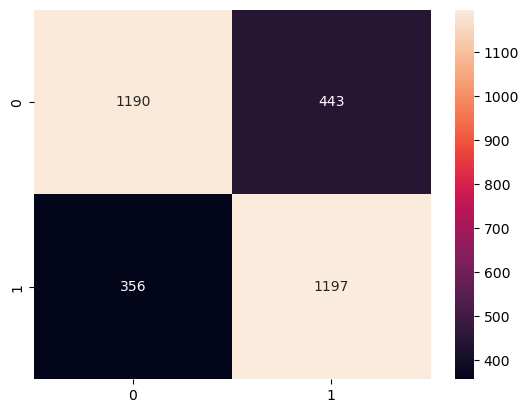

In [182]:
sns.heatmap(cm, annot=True, fmt='.0f')

## DECISION TREE MODEL

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
model=DecisionTreeClassifier()

model.fit(X_train,y_train)

predictions2=model.predict(X_test)

## MODEL EVALUATION

In [185]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test,predictions2))

Accuracy: 0.7853107344632768


In [186]:
f1_score(y_test, predictions2)

0.7850408548082967

In [187]:
recall_score(y_test,predictions2)

0.8042498390212492

In [188]:
precision_score(y_test,predictions2)

0.7667280540208717

In [189]:
train_accuracy =accuracy_score(y_train,model.predict(X_train))
print('Train_accuracy:',train_accuracy)

test_accuracy= accuracy_score(y_test,predictions2)
print('Test_accuracy:', test_accuracy)


if train_accuracy > test_accuracy:
    print("Possible overfitting")
elif test_accuracy < train_accuracy:
    print("Possible underfitting")
else:
    print ("Model is performing cosistently on both training and testing data")

Train_accuracy: 1.0
Test_accuracy: 0.7853107344632768
Possible overfitting


In [190]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1633
           1       0.77      0.80      0.79      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [191]:
f1_score(y_test,predictions2)

0.7850408548082967

In [192]:
cm=confusion_matrix(y_test,predictions2)
print (cm)

[[1253  380]
 [ 304 1249]]


<Axes: >

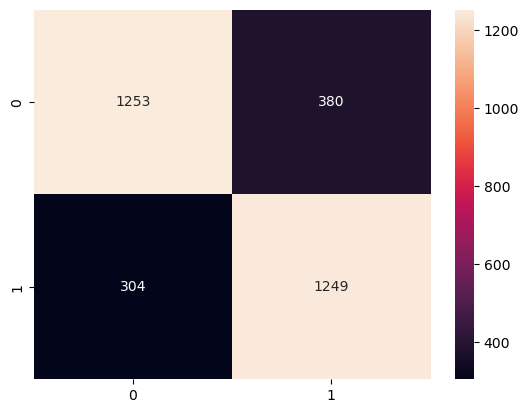

In [193]:
sns.heatmap(cm,annot=True, fmt='.0f')

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],  # Limit tree depth to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [195]:
from sklearn.tree import DecisionTreeClassifier

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=10, 
    min_samples_leaf=1, 
    min_samples_split=10
)

best_model.fit(X_train, y_train)  # Train on full training data


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

In [196]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model with the best hyperparameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

# Train the model using your training data
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

In [197]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.8400
Test Accuracy: 0.8029
Confusion Matrix:
 [[1293  340]
 [ 288 1265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1633
           1       0.79      0.81      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



## RANDOM CLASSIFIER

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on the dataset
rf_model.fit(X_train, y_train)

# Make predictions
predictions3 = rf_model.predict(X_test)




## MODEL EVALUATION

In [199]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test,predictions3))

Accuracy: 0.8477715003138732


In [200]:
f1_score(y_test,predictions3)

0.8465675419171148

In [201]:
recall_score(y_test,predictions3)

0.8615582743077914

In [202]:
precision_score(y_test,predictions3)

0.832089552238806

In [203]:
test_accuracy = accuracy_score(y_test, predictions3)
print('Test Accuracy:', test_accuracy)


Test Accuracy: 0.8477715003138732


In [204]:
train_accuracy = accuracy_score(y_train,model.predict(X_train))
print('Train accuracy:', train_accuracy)

Train accuracy: 0.8399529042386186


In [205]:
# this helps define a significant threshold to distinguish between overfitting and underfitting 
#by comparing training and test accuracy

threshold=0.5

if train_accuracy-test_accuracy>threshold:
    print('Possible overfitting')
else:
    print('No significant overfitting ')

No significant overfitting 


In [206]:
from sklearn.metrics import classification_report

print (classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1633
           1       0.83      0.86      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [207]:
!pip install xgboost

In [208]:
import xgboost as xgb

print (xgb.__version__)

3.0.0


## XGBOOST (EXTREME GRADIENT BOOSTING)

In [209]:
# Initializing the XGBoost Classifier
xgb_model =xgb.XGBClassifier(
n_estimators=100,
learning_rate=0.1,
max_depth=5,
random_state=42,
eval_metrics='logloss')

xgb_model.fit(X_train,y_train)

predictions4= xgb_model.predict(X_test)

In [210]:
threshold= 0.5

train_accuracy = accuracy_score(y_train,model.predict(X_train))
print('Train accuracy:', train_accuracy)

test_accuracy= accuracy_score(y_test,predictions4)
print('Test accuracy:',test_accuracy)

if train_accuracy-test_accuracy > threshold:
    print('Possible overfitting')
else: 
    print('No significant overfitting: Model performs well on both train and test data')



Train accuracy: 0.8399529042386186
Test accuracy: 0.8317639673571877
No significant overfitting: Model performs well on both train and test data


In [211]:
from sklearn.metrics import accuracy_score
print ('Accuracy_score:', accuracy_score(y_test,predictions4))

Accuracy_score: 0.8317639673571877


In [212]:
print (classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1633
           1       0.82      0.85      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



In [213]:
f1_score(y_test,predictions4)

0.8304870335230866

In [214]:
precision_score(y_test, predictions4)

0.8160348042262274

In [215]:
recall_score(y_test, predictions4)

0.845460399227302

In [216]:
precision_score(y_test,predictions4)

0.8160348042262274

## COMPARING THE BEST MODEL

In [217]:
Final_data= pd.DataFrame({
                         'Models':['LogisticRegression','DecisionTree','RandomClassifier','ExtremeGradientBoost'],
                         'Accuracy':[
                             accuracy_score(y_test,predictions1),
                             accuracy_score(y_test,predictions2),
                             accuracy_score(y_test,predictions3),
                             accuracy_score(y_test,predictions4)]
                         })
print(Final_data)

                 Models  Accuracy
0    LogisticRegression  0.749215
1          DecisionTree  0.785311
2      RandomClassifier  0.847772
3  ExtremeGradientBoost  0.831764


In [218]:
Final_data2= pd.DataFrame({
                         'Models':['LogisticRegression','DecisionTree','RandomClassifier','ExtremeGradientBoost'],
                         'Accuracy':[
                             f1_score(y_test, predictions1),
                             f1_score(y_test, predictions2),
                             f1_score(y_test, predictions3),
                             f1_score(y_test, predictions4)]
                             })
print (Final_data2)

                 Models  Accuracy
0    LogisticRegression  0.749765
1          DecisionTree  0.785041
2      RandomClassifier  0.846568
3  ExtremeGradientBoost  0.830487


In [219]:
Final_data3= pd.DataFrame({
                         'Models':['LogisticRegression','DecisionTree','RandomClassifier','ExtremeGradientBoost'],
                         'Accuracy':[
                             recall_score(y_test,predictions1),
                             recall_score(y_test,predictions2),
                             recall_score(y_test,predictions3),
                             recall_score(y_test,predictions4)]
})
print (Final_data3)

                 Models  Accuracy
0    LogisticRegression  0.770766
1          DecisionTree  0.804250
2      RandomClassifier  0.861558
3  ExtremeGradientBoost  0.845460


In [220]:
Final_data4= pd.DataFrame({
                         'Models':['LogisticRegression','DecisionTree','RandomClassifier','ExtremeGradientBoost'],
                         'Accuracy':[
                             precision_score(y_test,predictions1),
                             precision_score(y_test,predictions2),
                             precision_score(y_test,predictions3),
                             precision_score(y_test,predictions4)]
})
print (Final_data4)

                 Models  Accuracy
0    LogisticRegression  0.729878
1          DecisionTree  0.766728
2      RandomClassifier  0.832090
3  ExtremeGradientBoost  0.816035


In [221]:
from tabulate import tabulate

# ✅ Assuming models are trained & these predictions are from `X_test`
predictions1_LogisticRegression = model.predict(X_test)
predictions2_DecisionTree = model.predict(X_test)
predictions3_RandomForest = rf_model.predict(X_test)
predictions4_XGBoost = xgb_model.predict(X_test)

# ✅ List of models and their respective predictions
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
predictions = [predictions1_LogisticRegression, 
               predictions2_DecisionTree, 
               predictions3_RandomForest, 
               predictions4_XGBoost]

# ✅ Initialize an empty list to store the metrics
metrics_list = []

# ✅ Loop through models and calculate performance metrics
for name, y_pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Change to 'macro' for multi-class
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    metrics_list.append([name, accuracy, precision, recall, f1])

# ✅ Create a DataFrame with updated values
metrics_matrix = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# ✅ Print table with tabulate (for better readability)
print(tabulate(metrics_matrix, headers='keys', tablefmt='grid'))


+----+---------------------+------------+-------------+----------+------------+
|    | Model               |   Accuracy |   Precision |   Recall |   F1-Score |
+====+=====================+============+=============+==========+============+
|  0 | Logistic Regression |   0.802888 |    0.788162 | 0.814552 |   0.80114  |
+----+---------------------+------------+-------------+----------+------------+
|  1 | Decision Tree       |   0.802888 |    0.788162 | 0.814552 |   0.80114  |
+----+---------------------+------------+-------------+----------+------------+
|  2 | Random Forest       |   0.847772 |    0.83209  | 0.861558 |   0.846568 |
+----+---------------------+------------+-------------+----------+------------+
|  3 | XGBoost             |   0.831764 |    0.816035 | 0.84546  |   0.830487 |
+----+---------------------+------------+-------------+----------+------------+


In [222]:
X_sm=sc.fit_transform(X_sm)

In [223]:
rf_model.fit(X_sm,y_sm)

RandomForestClassifier(random_state=42)

In [224]:
import joblib

In [225]:
joblib.dump(rf_model, 'Bank_churn_model')

['Bank_churn_model']

In [226]:
model=joblib.load('Bank_churn_model')

In [227]:
cat_feature.columns

Index(['Geography', 'Gender', 'Exited', 'CreditCard', 'Active Member',
       'CreditScore', 'Tenure', 'Balance', 'No of Products', 'EstimatedSalary',
       'Age_Category'],
      dtype='object')

In [228]:
# Your input data as a 1D array
input_data = np.array([0, 0,0,0,308,1,0.00,1,93826.63,0])

# Reshape the input data into a 2D array
input_data_2d = input_data.reshape(1, -1)

# Now pass the reshaped data to the model
prediction = model.predict(input_data_2d)

print(prediction)

[0]


In [229]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def on_button_clicked(b):
    clear_output(wait=True)  
    display(input_widgets) 

    try:
        input_data = [
            float(Geography.value),
            float(Gender.value),
            float(CreditCard.value),
            float(Active_Member.value),
            float(CreditScore.value),
            float(Tenure.value),
            float(Balance.value),
            float(No_of_Products.value),
            float(EstimatedSalary.value),
            float(Age_Category.value)
            
        ]

        input_data_2d = np.array(input_data).reshape(1, -1)
        prediction = model.predict(input_data_2d)
        print(f"Prediction: {prediction[0]}")
    except ValueError:
        print("Invalid input. Please enter numeric values.")



Geography = widgets.Text(description='Geography:')
Gender = widgets.Text(description='Gender:')
CreditCard = widgets.Text(description='CreditCard:')
Active_Member= widgets.Text(description='Active Member:')
CreditScore = widgets.Text(description='CreditScore:')
Tenure = widgets.Text(description='Tenure:')
Balance = widgets.Text(description='Balance:')
No_of_Products= widgets.Text(description='No of Products:')
EstimatedSalary = widgets.Text(description='Estimated Salary:')
Age_Category = widgets.Text(description='Age_Category:')



predict_button = widgets.Button(description="Predict")
predict_button.on_click(on_button_clicked)


input_widgets = widgets.VBox([
   Geography, Gender, CreditCard, Active_Member, CreditScore,
    Tenure, Balance, No_of_Products,
    EstimatedSalary, Age_Category,
    predict_button
])

display(input_widgets)


In [230]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


def on_button_clicked(b):
    clear_output(wait=True)
    display(input_widgets)  

    try:
        input_data = [
            float(Geography.value),
            float(Gender.value),
            float(CreditCard.value),
            float(Active_Member.value),
            float(CreditScore.value),
            float(Tenure.value),
            float(Balance.value),
            float(No_of_Products.value),
            float(EstimatedSalary.value),
            float(Age_Category.value)
        ]

        input_data_2d = np.array(input_data).reshape(1, -1)
        prediction = model.predict(input_data_2d)
        print(f"Prediction: {prediction[0]}")
    except ValueError:
        print("Invalid input. Please enter numeric values.")


Geography = widgets.Text(description='Geography:')
Gender = widgets.Text(description='Gender:')
CreditCard = widgets.Text(description='CreditCard:')
Active_Member = widgets.Text(description='Active Member:')
CreditScore = widgets.Text(description='CreditScore:')
Tenure = widgets.Text(description='Tenure:')
Balance = widgets.Text(description='Balance:')
No_of_Products = widgets.Text(description='No of Products:')
EstimatedSalary = widgets.Text(description='Estimated Salary:')
Age_Category = widgets.Text(description='Age Category:')


predict_button = widgets.Button(description="Predict")
predict_button.on_click(on_button_clicked)

input_widgets = widgets.VBox([
   Geography, Gender, CreditCard, Active_Member, CreditScore,
   Tenure, Balance, No_of_Products, EstimatedSalary, Age_Category,
   predict_button
])

display(input_widgets)


img = Image.new("RGB", (400, 300), color="white")
draw = ImageDraw.Draw(img)

y_pos = 10
for text in ["Geography:", "Gender:", "CreditCard:", "Active Member:", 
             "CreditScore:", "Tenure:", "Balance:", "No of Products:", 
             "Estimated Salary:", "Age Category:", "Predict Button"]:
    draw.rectangle([10, y_pos, 390, y_pos+30], outline="black", width=2)
    draw.text((20, y_pos+8), text, fill="black")
    y_pos += 35

img.save("static_widgets.png")
print("Static UI saved as static_widgets.png")


Static UI saved as static_widgets.png
